<a href="https://colab.research.google.com/github/gadilshina-ve/SoftwareTools_DA/blob/main/PW_3/PW_3_Gadilshina_Valentina_Evgenevna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Вариант 16 - Гадильшина Валентина Евгеньевна, БД-231м.**
1. Файл CSV: данные о партнёрах компании (имя партнёра, сумма контракта).
2. Файл Excel: данные о проектах (партнёр, проект, бюджет).
3. Файл JSON: данные о выполнении проектов (партнёр, проект, выполненный
объём работы).

**Задача:** объединить данные и оценить степень выполнения работ по
каждому партнёру.

In [1]:
import pandas as pd
import numpy as np
import json
from datetime import datetime, timedelta
import random

In [2]:
# Функция для генерации случайной даты
def random_date(start, end):
    return start + timedelta(
        seconds=random.randint(0, int((end - start).total_seconds()))
    )

# **1. Создание projects_completion.json:**


1.   Определяем список партнёров - 10 названий партнеров.
2.   Генерируем 100 уникальных проектов с полями: partner, project, completed_work % и completion_date.
3. Каждому проекту присваивается случайный партнёр и объём выполненных работ, а также случайная дата окончания контракта.
4. Данные сохраняются в формате JSON.

In [3]:
# имя партнёра
partners = [
    'TechNova',
    'GreenEnergy',
    'SkyNet Solutions',
    'HealthCorp',
    'EduFuture',
    'AutoDrive',
    'AgriTech',
    'BuildMasters',
    'CleanPower',
    'MediaHouse'
]

In [4]:
# Генерация данных о выполнении проектов для файла о выполнении проектов (projects_completion.json)
projects_json = []
for i in range(100):  # Генерируем 100 проектов
    project = {
        'partner': random.choice(partners),
        'project': f'Project_{i}',
        'completed_work %': round(random.uniform(0, 101)),  # Объём работы
        'contract_end_date': random_date(datetime(2023, 1, 1), datetime(2023, 12, 31)).strftime('%Y-%m-%d')  # Дата окончания контракта
    }
    projects_json.append(project)

In [5]:
# Сохранение данных о выполнении проектов в JSON
with open('projects_completion.json', 'w', encoding='utf-8') as f:
    json.dump(projects_json, f, ensure_ascii=False, indent=4)
print("Файл projects_completion.json создан")

Файл projects_completion.json создан


In [6]:
#from google.colab import files
#files.download('projects_completion.json')

# **2. Создание partners_contracts.csv:**
1. Определяем период контрактов с 1 января по 31 декабря 2022 года.
2. Генерируем 10000 записей о контрактах.
3. Для каждого контракта случайным образом выбирается партнёр из списка.
4. Генерируется случайная дата заключения контракта в пределах 2022 года.
5. Сумма контракта выбирается случайно от 100000 до 10000000.
6. Данные сохраняются в формате CSV.

In [7]:
# Генерация данных о контрактах за 2022 год для файла о партнёрах (partners_contracts.csv)
contracts_2022 = []
for _ in range(10000):  # Генерируем 10000 записей о контрактах
    contract = {
        'partner': random.choice(partners),
        'contract_amount': round(random.uniform(100000, 10000000), 2),  # Сумма контракта
        'contract_date': random_date(datetime(2022, 1, 1), datetime(2022, 12, 31)).strftime('%Y-%m-%d')  # Дата заключения контракта
    }
    contracts_2022.append(contract)

In [8]:
df_2022 = pd.DataFrame(contracts_2022)
df_2022.to_csv('partners_contracts.csv', index=False)
print("Файл partners_contracts.csv создан")

Файл partners_contracts.csv создан


In [9]:
#from google.colab import files
#files.download('partners_contracts.csv')

# **3. Создание projects_budget.xlsx:**
1. Определяем период проектов с 1 января по 31 декабря 2023 года.
2. Генерируем 12000 записей о проектах.
3. Для каждого проекта случайным образом выбирается партнёр из списка.
4. Генерируется случайная дата выполнения проекта в пределах 2023 года.
5. Бюджет проекта выбирается случайно от 50000 до 5000000.
6. Данные сохраняются в формате Excel.

In [10]:
# Генерация данных о проектах за 2023 год для файла о проектах (projects_budget.xlsx)
projects_2023 = []
for _ in range(12000):  # Генерируем 12000 записей о проектах
    project = {
        'partner': random.choice(partners),
        'project': f'Project_{random.randint(1, 100)}',  # Случайный проект
        'budget': round(random.uniform(50000, 5000000), 2),  # Бюджет
        'project_end_date': random_date(datetime(2023, 1, 1), datetime(2023, 12, 31)).strftime('%Y-%m-%d')  # дата выполнения проекта
    }
    projects_2023.append(project)

In [11]:
df_2023 = pd.DataFrame(projects_2023)
df_2023.to_excel('projects_budget.xlsx', index=False)
print("Файл projects_budget.xlsx создан")

Файл projects_budget.xlsx создан


In [12]:
#from google.colab import files
#files.download('projects_budget.xlsx')

In [13]:
print("Все файлы с тестовыми данными успешно созданы.")

Все файлы с тестовыми данными успешно созданы.


# **Ход работы:**

In [14]:
#Шаг 1: Подготовка рабочей среды
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
#Шаг 2: Загрузка данных
df_partners_contracts = pd.read_csv('partners_contracts.csv')
print("Данные о партнёрах компании (имя партнёра, сумма контракта, дата заключения контракта):")
print(df_partners_contracts.head())

Данные о партнёрах компании (имя партнёра, сумма контракта, дата заключения контракта):
        partner  contract_amount contract_date
0     EduFuture       6742572.93    2022-12-07
1  BuildMasters       7432047.91    2022-08-17
2    CleanPower        510543.24    2022-09-10
3      TechNova       9643978.62    2022-01-30
4      TechNova       6534147.17    2022-08-20


In [16]:
df_projects_budget = pd.read_excel('projects_budget.xlsx')
print("Данные о проектах (имя партнёра, проект, бюджет, дата выполнения проекта):")
print(df_projects_budget.head())

Данные о проектах (имя партнёра, проект, бюджет, дата выполнения проекта):
            partner     project      budget project_end_date
0          AgriTech  Project_34  4161193.09       2023-10-28
1          TechNova  Project_52  3392519.48       2023-03-30
2        HealthCorp  Project_15  1543504.40       2023-05-08
3         AutoDrive  Project_47  2168362.30       2023-03-25
4  SkyNet Solutions  Project_84   223357.35       2023-03-15


In [17]:
df_projects = pd.read_json('projects_completion.json')
print("Данные о выполнении проектов (имя партнёра, код проекта, выполненный объём работы в процентах, дата окончания контракта):")
print(df_projects.head())

Данные о выполнении проектов (имя партнёра, код проекта, выполненный объём работы в процентах, дата окончания контракта):
        partner    project  completed_work % contract_end_date
0    CleanPower  Project_0                45        2023-11-07
1  BuildMasters  Project_1                25        2023-04-28
2  BuildMasters  Project_2                66        2023-02-05
3     EduFuture  Project_3                53        2023-02-27
4    MediaHouse  Project_4                41        2023-07-09


In [18]:
#Шаг 3: Предварительная обработка и очистка данных
print("\nПропущенные значения:")
print(df_partners_contracts.isnull().sum())
print(df_projects_budget.isnull().sum())
print(df_projects.isnull().sum())


Пропущенные значения:
partner            0
contract_amount    0
contract_date      0
dtype: int64
partner             0
project             0
budget              0
project_end_date    0
dtype: int64
partner              0
project              0
completed_work %     0
contract_end_date    0
dtype: int64


In [19]:
#3. Приведите названия столбцов к единому формату:
df_partners_contracts.columns = df_partners_contracts.columns.str.lower()
df_projects_budget.columns = df_projects_budget.columns.str.lower()
df_projects.columns = df_projects.columns.str.lower()


In [20]:
# Шаг 4: Объединение данных
#Объединение данных о партнёрах и проектах
df_merged = pd.merge(df_partners_contracts, df_projects, on='partner', how='outer')
df_merged

,partner,contract_amount,contract_date,project,completed_work %,contract_end_date
0,EduFuture,6742572.93,2022-12-07,Project_3,53,2023-02-27
1,EduFuture,6742572.93,2022-12-07,Project_26,29,2023-07-04
2,EduFuture,6742572.93,2022-12-07,Project_42,82,2023-12-08
3,EduFuture,6742572.93,2022-12-07,Project_46,81,2023-06-16
4,EduFuture,6742572.93,2022-12-07,Project_48,11,2023-12-21
...,...,...,...,...,...,...
100028,GreenEnergy,5175932.78,2022-07-11,Project_57,16,2023-07-09
100029,GreenEnergy,5175932.78,2022-07-11,Project_60,98,2023-09-26
100030,GreenEnergy,5175932.78,2022-07-11,Project_72,79,2023-12-17
100031,GreenEnergy,5175932.78,2022-07-11,Project_80,47,2023-09-13


In [21]:
# Проверка есть ли дубликаты в исходных данных
print(df_merged.duplicated(subset=['partner', 'project']).sum())

99933


In [22]:
# Удаление дубликатов
df_concat = df_merged.drop_duplicates(subset=['partner', 'project'])
df_concat

,partner,contract_amount,contract_date,project,completed_work %,contract_end_date
0,EduFuture,6742572.93,2022-12-07,Project_3,53,2023-02-27
1,EduFuture,6742572.93,2022-12-07,Project_26,29,2023-07-04
2,EduFuture,6742572.93,2022-12-07,Project_42,82,2023-12-08
3,EduFuture,6742572.93,2022-12-07,Project_46,81,2023-06-16
4,EduFuture,6742572.93,2022-12-07,Project_48,11,2023-12-21
...,...,...,...,...,...,...
91226,GreenEnergy,4425354.48,2022-04-18,Project_57,16,2023-07-09
91227,GreenEnergy,4425354.48,2022-04-18,Project_60,98,2023-09-26
91228,GreenEnergy,4425354.48,2022-04-18,Project_72,79,2023-12-17
91229,GreenEnergy,4425354.48,2022-04-18,Project_80,47,2023-09-13


In [23]:
# Шаг 4: Объединение с данными о выполнении проектов
df_final = pd.merge(df_concat, df_projects_budget, on=['partner', 'project'], how='outer')
df_final

,partner,contract_amount,contract_date,project,completed_work %,contract_end_date,budget,project_end_date
0,EduFuture,6742572.93,2022-12-07,Project_3,53.0,2023-02-27,552801.53,2023-10-29
1,EduFuture,6742572.93,2022-12-07,Project_3,53.0,2023-02-27,3092441.72,2023-05-19
2,EduFuture,6742572.93,2022-12-07,Project_3,53.0,2023-02-27,1109288.36,2023-09-05
3,EduFuture,6742572.93,2022-12-07,Project_3,53.0,2023-02-27,4491774.30,2023-10-23
4,EduFuture,6742572.93,2022-12-07,Project_3,53.0,2023-02-27,272546.75,2023-08-21
...,...,...,...,...,...,...,...,...
11996,CleanPower,NaN,NaN,Project_87,NaN,NaN,173329.43,2023-08-26
11997,CleanPower,NaN,NaN,Project_87,NaN,NaN,4785632.90,2023-12-01
11998,CleanPower,NaN,NaN,Project_87,NaN,NaN,908016.42,2023-12-08
11999,CleanPower,NaN,NaN,Project_87,NaN,NaN,60678.82,2023-02-01


In [24]:
# Проверка есть ли дубликаты в исходных данных
print(df_final.duplicated(subset=['partner', 'project']).sum())

11000


In [25]:
# Удаление дубликатов
df_final = df_final.drop_duplicates(subset=['partner', 'project'])
df_final

,partner,contract_amount,contract_date,project,completed_work %,contract_end_date,budget,project_end_date
0,EduFuture,6742572.93,2022-12-07,Project_3,53.0,2023-02-27,552801.53,2023-10-29
11,EduFuture,6742572.93,2022-12-07,Project_26,29.0,2023-07-04,953376.10,2023-06-12
25,EduFuture,6742572.93,2022-12-07,Project_42,82.0,2023-12-08,3010027.69,2023-11-19
40,EduFuture,6742572.93,2022-12-07,Project_46,81.0,2023-06-16,1090951.44,2023-09-24
46,EduFuture,6742572.93,2022-12-07,Project_48,11.0,2023-12-21,425636.41,2023-06-15
...,...,...,...,...,...,...,...,...
11957,BuildMasters,NaN,NaN,Project_88,NaN,NaN,1286956.18,2023-02-24
11967,CleanPower,NaN,NaN,Project_77,NaN,NaN,3744749.35,2023-08-12
11975,TechNova,NaN,NaN,Project_51,NaN,NaN,1925439.95,2023-10-03
11981,TechNova,NaN,NaN,Project_90,NaN,NaN,2807595.55,2023-11-19


In [26]:
print("\nПропущенные значения:")
print(df_final.isnull().sum())


Пропущенные значения:
partner                0
contract_amount      901
contract_date        901
project                0
completed_work %     901
contract_end_date    901
budget                 1
project_end_date       1
dtype: int64


In [27]:
# Удаление строк с любыми пропущенными значениями
df_final_cleaned = df_final.dropna()

# Проверка на пропущенные значения после удаления
print("\nПропущенные значения после удаления строк:")
print(df_final_cleaned.isnull().sum())


Пропущенные значения после удаления строк:
partner              0
contract_amount      0
contract_date        0
project              0
completed_work %     0
contract_end_date    0
budget               0
project_end_date     0
dtype: int64


In [28]:
df_final_cleaned

,partner,contract_amount,contract_date,project,completed_work %,contract_end_date,budget,project_end_date
0,EduFuture,6742572.93,2022-12-07,Project_3,53.0,2023-02-27,552801.53,2023-10-29
11,EduFuture,6742572.93,2022-12-07,Project_26,29.0,2023-07-04,953376.10,2023-06-12
25,EduFuture,6742572.93,2022-12-07,Project_42,82.0,2023-12-08,3010027.69,2023-11-19
40,EduFuture,6742572.93,2022-12-07,Project_46,81.0,2023-06-16,1090951.44,2023-09-24
46,EduFuture,6742572.93,2022-12-07,Project_48,11.0,2023-12-21,425636.41,2023-06-15
...,...,...,...,...,...,...,...,...
1147,GreenEnergy,4425354.48,2022-04-18,Project_57,16.0,2023-07-09,3772425.71,2023-06-11
1159,GreenEnergy,4425354.48,2022-04-18,Project_60,98.0,2023-09-26,1781852.48,2023-05-26
1170,GreenEnergy,4425354.48,2022-04-18,Project_72,79.0,2023-12-17,3496380.91,2023-04-01
1181,GreenEnergy,4425354.48,2022-04-18,Project_80,47.0,2023-09-13,3424053.39,2023-06-21


In [29]:
# Проверка на наличие дубликатов в df_final_cleaned
duplicates = df_final_cleaned.duplicated()
print("\nКоличество дубликатов:", duplicates.sum())


Количество дубликатов: 0


In [30]:
df_final_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99 entries, 0 to 1195
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   partner            99 non-null     object 
 1   contract_amount    99 non-null     float64
 2   contract_date      99 non-null     object 
 3   project            99 non-null     object 
 4   completed_work %   99 non-null     float64
 5   contract_end_date  99 non-null     object 
 6   budget             99 non-null     float64
 7   project_end_date   99 non-null     object 
dtypes: float64(3), object(5)
memory usage: 9.0+ KB


In [31]:
# Шаг 5: Агрегация и трансформация данных
df_aggregated = df_final_cleaned.groupby('partner').agg(
    average_contract_amount=('contract_amount', 'mean'),
    average_completed_work=('completed_work %', 'mean'),
    average_budget=('budget', 'mean'),
    total_contract_amount=('contract_amount', 'sum'),
    total_projects=('project', 'count')
).reset_index()

print("\nАгрегированные данные:")
df_aggregated


Агрегированные данные:


,partner,average_contract_amount,average_completed_work,average_budget,total_contract_amount,total_projects
0,AgriTech,2859024.52,46.769231,2.360862e+06,3.716732e+07,13
1,AutoDrive,8777676.47,45.285714,1.814563e+06,1.228875e+08,14
2,BuildMasters,7432047.91,64.000000,3.441947e+06,4.459229e+07,6
3,CleanPower,510543.24,51.333333,2.293436e+06,6.126519e+06,12
4,EduFuture,6742572.93,54.636364,1.729232e+06,7.416830e+07,11
5,GreenEnergy,4425354.48,51.000000,2.851121e+06,3.982819e+07,9
6,HealthCorp,9621473.33,53.285714,2.909481e+06,6.735031e+07,7
7,MediaHouse,2018802.75,48.625000,2.603383e+06,1.615042e+07,8
8,SkyNet Solutions,7383529.74,55.400000,2.938723e+06,7.383530e+07,10
9,TechNova,9643978.62,63.111111,2.971552e+06,8.679581e+07,9


In [32]:
# Создание нового столбца с выручкой с вычетом 20% НДФЛ
df_final_cleaned.loc[:, 'revenue'] = (df_final_cleaned['contract_amount'] - df_final_cleaned['budget']) * 0.8

# Вывод данных с добавленным столбцом выручки
print("\nДанные с добавленным столбцом выручки:")
df_final_cleaned


Данные с добавленным столбцом выручки:


<ipython-input-32-5434c3c7ef06>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_cleaned.loc[:, 'revenue'] = (df_final_cleaned['contract_amount'] - df_final_cleaned['budget']) * 0.8


,partner,contract_amount,contract_date,project,completed_work %,contract_end_date,budget,project_end_date,revenue
0,EduFuture,6742572.93,2022-12-07,Project_3,53.0,2023-02-27,552801.53,2023-10-29,4951817.120
11,EduFuture,6742572.93,2022-12-07,Project_26,29.0,2023-07-04,953376.10,2023-06-12,4631357.464
25,EduFuture,6742572.93,2022-12-07,Project_42,82.0,2023-12-08,3010027.69,2023-11-19,2986036.192
40,EduFuture,6742572.93,2022-12-07,Project_46,81.0,2023-06-16,1090951.44,2023-09-24,4521297.192
46,EduFuture,6742572.93,2022-12-07,Project_48,11.0,2023-12-21,425636.41,2023-06-15,5053549.216
...,...,...,...,...,...,...,...,...,...
1147,GreenEnergy,4425354.48,2022-04-18,Project_57,16.0,2023-07-09,3772425.71,2023-06-11,522343.016
1159,GreenEnergy,4425354.48,2022-04-18,Project_60,98.0,2023-09-26,1781852.48,2023-05-26,2114801.600
1170,GreenEnergy,4425354.48,2022-04-18,Project_72,79.0,2023-12-17,3496380.91,2023-04-01,743178.856
1181,GreenEnergy,4425354.48,2022-04-18,Project_80,47.0,2023-09-13,3424053.39,2023-06-21,801040.872


<ipython-input-33-53e2aed31357>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=revenue_data, x='partner', y='revenue', palette='viridis')


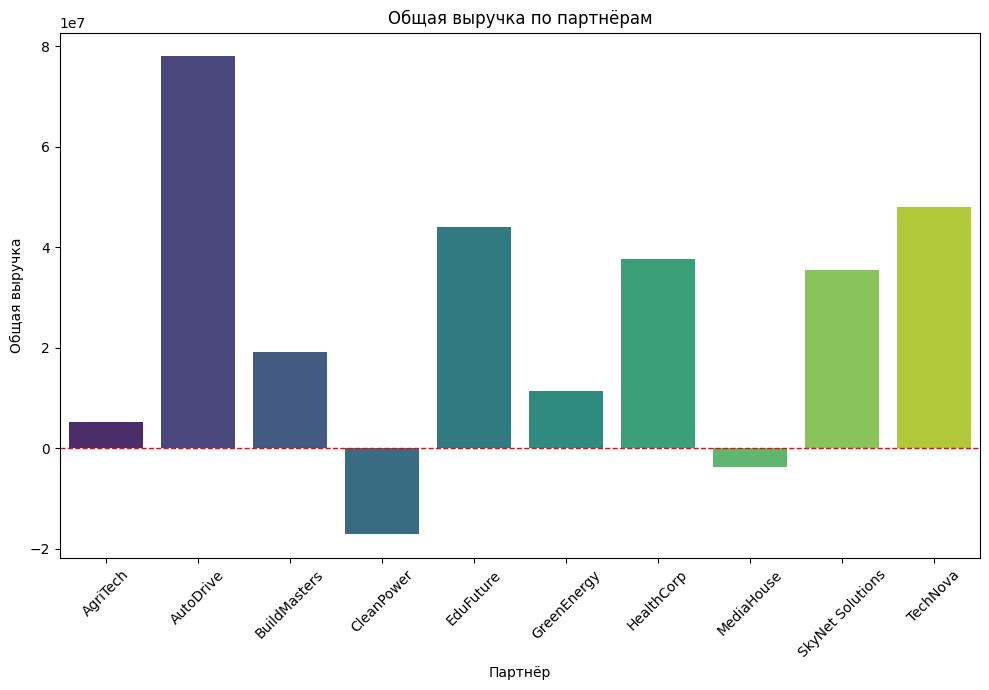

In [33]:
#Шаг 6: Визуализация данных
import matplotlib.pyplot as plt
import seaborn as sns

revenue_data = df_final_cleaned.groupby('partner')['revenue'].sum().reset_index()

plt.figure(figsize=(10, 7))
sns.barplot(data=revenue_data, x='partner', y='revenue', palette='viridis')
plt.title('Общая выручка по партнёрам')
plt.xlabel('Партнёр')
plt.ylabel('Общая выручка')
plt.xticks(rotation=45)

# Добавление разделительной линии на уровне нуля
plt.axhline(0, color='red', linewidth=1, linestyle='--')  # Красная пунктирная линия

plt.tight_layout()
plt.show()


**Вывод:** Гистограмма показывет распределение выручки от проектов для каждого партнёра. Это позволило визуализировать, какие партнёры приносят больше прибыли, а от каких стоит отказаться.

In [34]:
#Шаг 7: Сохранение консолидированных данных
df_final_cleaned.to_csv('consolidated_revenue_data.csv', index=False)
print("\nКонсолидированные данные сохранены в файл 'consolidated_revenue_data.csv'")


Консолидированные данные сохранены в файл 'consolidated_revenue_data.csv'


In [36]:
from google.colab import files
files.download('consolidated_revenue_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>